In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


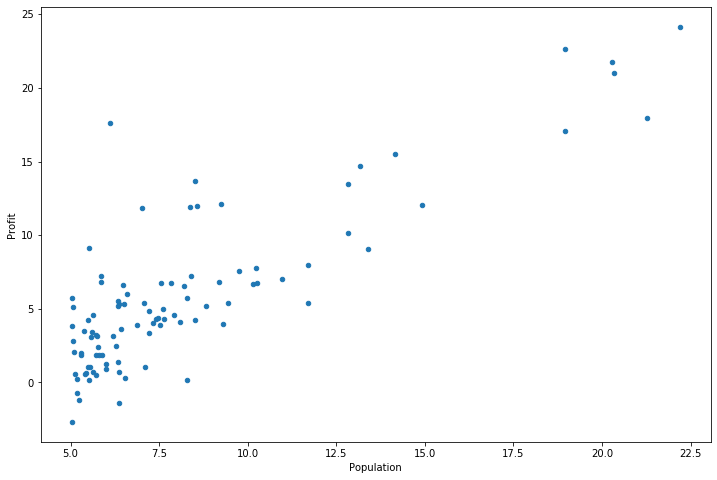

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

## Cost Function
![](img/cost.png)

In [5]:
# set x0 = 1
data.insert(0, 'x0(j)', 1)
data.head()

,x0(j),Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

In [7]:
X.head()

,x0(j),Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0])) # set theta1 = 0, theta2 = 0

In [10]:
#Row x Col
X.shape, Y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [11]:
# Cost Function
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

In [12]:
computeCost(X, Y, theta)

32.072733877455676

# Gradient Descent

![](img/gradient.png)

In [13]:
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    numFea = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        errors = X * theta.T - Y
        
        for j in range(numFea):
            XsTimeErrorsSum = np.matmul(X[:,j].transpose(), errors)[0,0] # this is a matrix multiplication
            partialDerivative = XsTimeErrorsSum/len(X)
            temp[0,j] = temp[0,j] - alpha * partialDerivative
    
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    
    return theta, cost

In [14]:
alpha = 0.01
iters = 1000
theta, cost = gradientDescent(X, Y, theta, alpha, iters)
theta

matrix([[-3.24140214,  1.1272942 ]])

In [15]:
predict1 = theta[0,0] + theta[0,1]*7
predict1

4.649657272722867

In [16]:
# error has been reduced
computeCost(X, Y, theta)

4.515955503078914

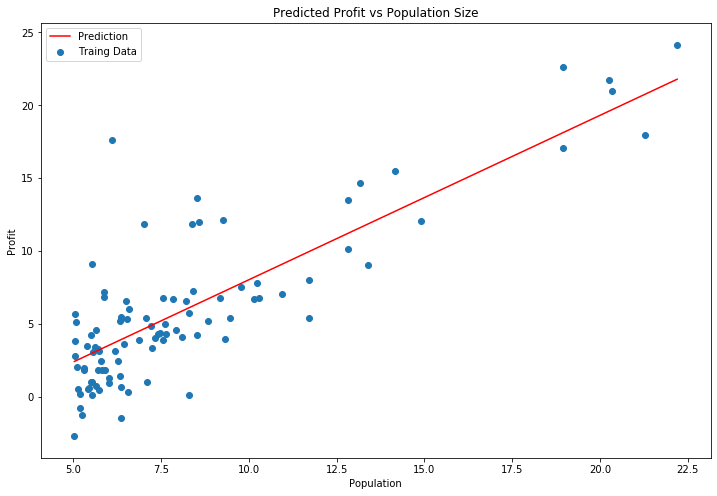

In [17]:
# plot regression figure
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0, 0] + theta[0, 1] * x

plt.figure(figsize=(12, 8))
plt.xlabel('Population')
plt.ylabel('Profit')
l1 = plt.plot(x, f, label='Prediction', color='red')
l2 = plt.scatter(data.Population, data.Profit, label='Traing Data', )
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()

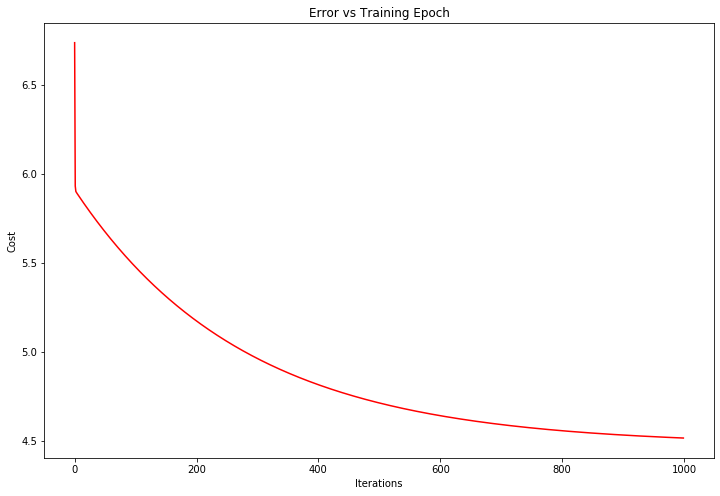

In [18]:
# plot cost fuction vs iterations
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs Training Epoch')
plt.plot(np.arange(iters), cost, 'r')
plt.show()

## Normal Equation
![](img/regularization.png)

In [19]:
def normalEqn(X, Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y
    return theta

In [20]:
theta = normalEqn(X, Y)
theta

matrix([[-3.89578088],
        [ 1.19303364]])

In [21]:
computeCost(X, Y, theta.reshape(1, -1))

4.476971375975179